# Aufgabe 1

Bestimmen Sie die Hesse Matrix des Skalarfeldes

\begin{align*}
f:\mathbb{R}^2 &\to \mathbb{R} \\
(x,y) &\mapsto f(x,y) = x^2y -2sin(xy)
\end{align*}



Dieses Skript ist in der Programmiersprache Python geschrieben, verwendet wird hier ein Jupyter Notebook. Grundsätzlich sind diese Notebooks interaktive Umgebungen, die es ermöglichen, Code auszuführen und Text und Formeln zu kombinieren.

Dazu werdet ihr aber mehr in höheren Semestern lernen zb TCII, TC Praktikum, Biochemische Methoden ...

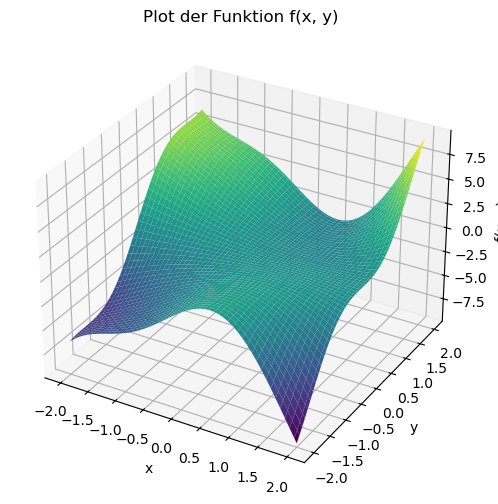

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definition der Funktion
def f(x, y):
    return x**2 * y - 2 * np.sin(x * y)

# Erstellen eines Gitters für x und y
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plotten der Funktion
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('Plot der Funktion f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()

Ihr seht nun hier die 3D Fläche des Skalarfeldes. Da das Skalarfeld eine Funktion von $\mathbb{R}^2 \to \mathbb{R}$ ist, können wir es als 3D Fläche darstellen. Dazu verwenden wir die Bibliothek Matplotlib, die eine einfache Möglichkeit bietet, 3D-Plots zu erstellen.


Was man nun zusätzlich machen kann ist sich das Gradientenfeld anzuschauen. Wir leiten also die Funktion nach den Variablen ab und stellen die resultierenden Vektoren dar. Dies gibt uns dann die lokale Steigung der Funktion an jedem Punkt

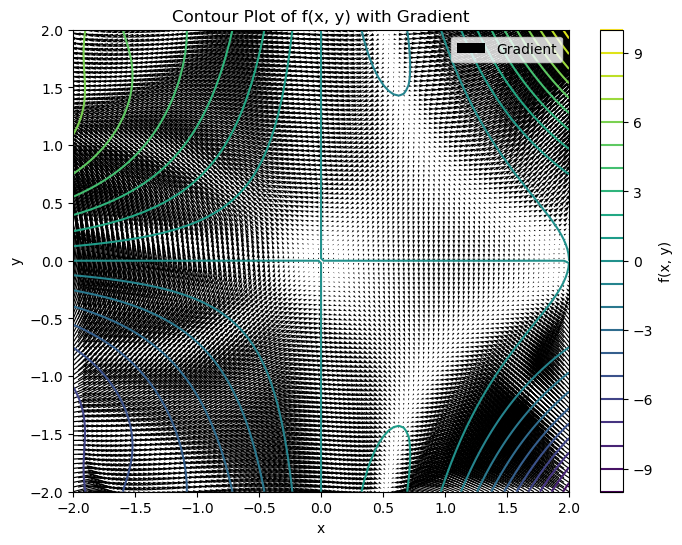

In [2]:
# Berechnung der Gradienten
def gradient_f(x, y):
    df_dx = 2 * x * y - 2 * y * np.cos(x * y)
    df_dy = x**2 - 2 * x * np.cos(x * y)
    return df_dx, df_dy

# Berechnung der Gradienten auf dem Gitter
df_dx, df_dy = gradient_f(X, Y)

# Contour plot of the function
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='f(x, y)')

# Add gradient as quivers
plt.quiver(X, Y, df_dx, df_dy, color='black', scale=100, label='Gradient')

# Add labels and title
plt.title('Contour Plot of f(x, y) with Gradient')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

# Aufgabe 2

Bestimmen Sie die stationären Punkte der Funktion 

\begin{align*}
f:\mathbb{R}^2 &\to \mathbb{R} \\
(x,y) &\mapsto f(x,y) = x^4 + 2xy + y^4
\end{align*}

Plotten sie die Funktion und finden sie die stationären Punkte. Wo befinden sich Minima und Maxima?

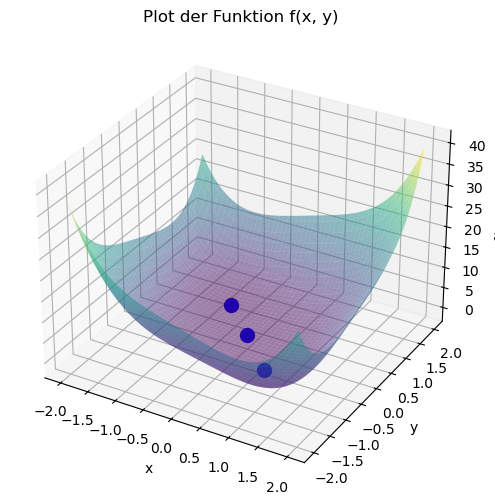

In [3]:
def f(x,y):
    return x**4 +2*x*y + y**4

# gradient of f
def gradient_f(x, y):
    df_dx = 4 * x**3 + 2 * y
    df_dy = 4 * y**3 + 2 * x
    return df_dx, df_dy

# Calculation of the gradient on the grid
df_dx, df_dy = gradient_f(X, Y)

zero_points_gradient = np.array([[0, 0],[1/np.sqrt(2),-1/np.sqrt(2)],[-1/np.sqrt(2),1/np.sqrt(2)]])

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# Add the zero points of the gradient
for point in zero_points_gradient:
    ax.scatter(point[0], point[1], f(point[0], point[1]), color='blue', s=100, label='Gradient Zero Point')


ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.set_title('Plot der Funktion f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()



# Aufgabe 3

Berechnen Sie das Totale Differential der folgenden Funktionen

\begin{align*}
f:\mathbb{R}^2 &\to \mathbb{R} \\
(x,y) &\mapsto f(x,y) = \sqrt{1+x^2+y^2}
\end{align*}

\begin{align*}
f:\mathbb{R}^3 &\to \mathbb{R} \\
(x,y,z) &\mapsto f(x,y,z) = \frac{x}{yz}
\end{align*}

\begin{align*}
f:\mathbb{R}^2 &\to \mathbb{R} \\
(x,y) &\mapsto f(x,y) = 2\sin(x)e^y
\end{align*}

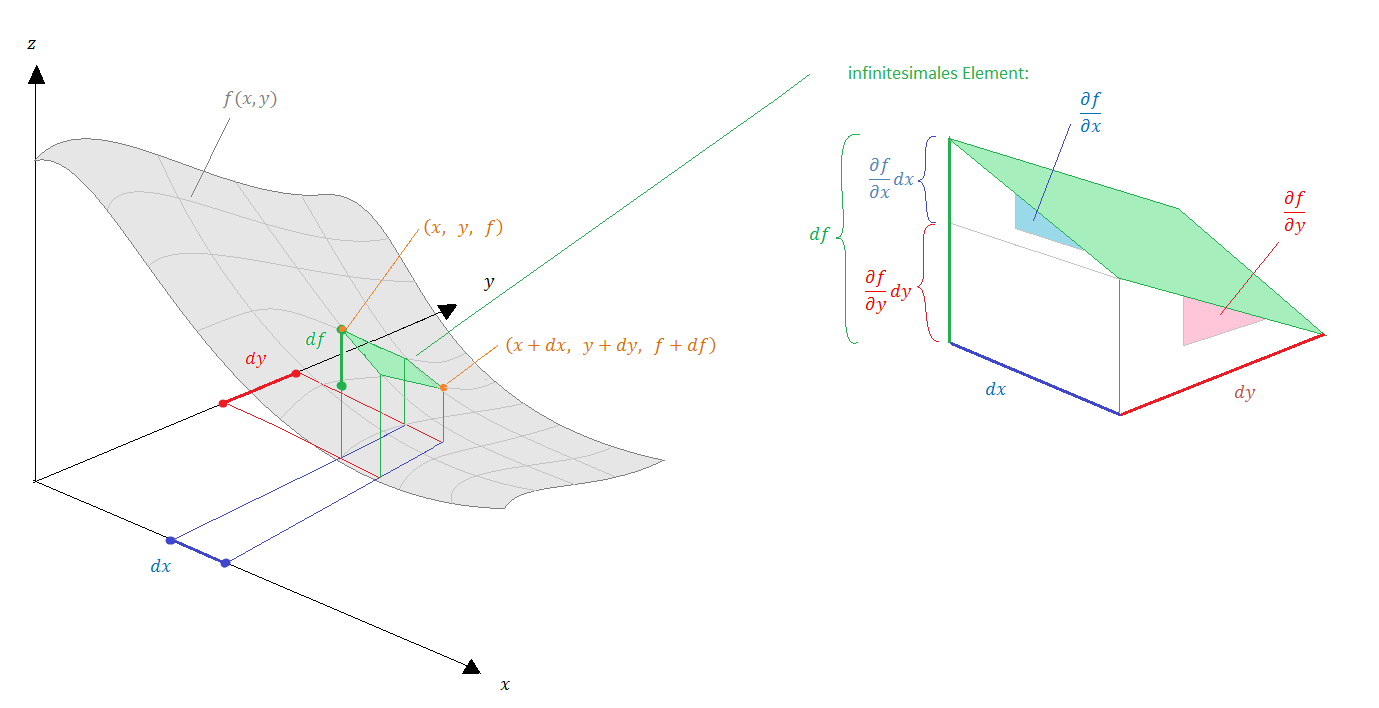

In [4]:
import plotly.graph_objects as go
import numpy as np

def f(x,y):
    return np.sqrt(1+x**2 + y**2)

# Calculate the Differential Numerically

x0,y0 = 0.5,1
z0 = f(x0,y0)
h= 0.0001
df_dx = (f(x0+h,y0)-f(x0-h,y0))/(2*h)
df_dy = (f(x0,y0+h)-f(x0,y0-h))/(2*h)

def tangetplane(x,y):
    return z0 + df_dx*(x-x0) + df_dy*(y-y0)

# Create a grid of points
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Z_tangent = tangetplane(X,Y)

# Create the 3D plot
fig = go.Figure()

# Add Surface plot of the function
fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.8, name='Surface'))
# Add Surface plot of the tangent plane
fig.add_trace(go.Surface(z=Z_tangent, x=X, y=Y, colorscale='Reds', opacity=0.5, name='Tangent Plane'))
#

# Aufgabe 4

Gebenen Sie das Vektorfeld 

\begin{align*}
\vec{F}:\mathbb{R}^3 &\to \mathbb{R}^3 \\
(x,y,z) &\mapsto \vec{F}(x,y,z) = (-y,x,z^2)
\end{align*}

nun ist es die Aufgabe die Rotation und Divergenz zu bestimmen.



### Divergenz

Die Divergenz eines Vektorfeldes ist ein Skalarfeld und gibt an wie sehr die Vektoren in einer kleinen Umgebung divergieren.

Recht anschauliches Beispiel ist eine Wasseroberfläche auf die man ein Strahl Öl gibt:

> Zu jeden beliebigen Zeipunkt ist die Fließgeschwindigkeit des Öls durch einen Vektor gegeben. Der Punkt wo der Ölstrahl auf die Wasseroberfläche trifft ist eine "Ölquelle", von dort fließt Öl weg ohne dass
> es weiteren Zusfluss gibt. Die Divergenz ist also positiv. Stellen wo das Öl beispielsweise aus dem Rand des Beckens abließt ist eine Stelle mit negativer Divergenz.


\begin{align*}
div \vec{F} = \frac{\partial F_1}{\partial x} + \frac{\partial F_2}{\partial y} + \frac{\partial F_3}{\partial z}
\end{align*}

### Rotation

Die Rotation eines Vektorfeldes ist selbst wieder ein Vektorfeld und gibt an wie sehr die Vektoren in einer kleinen Umgebung rotieren

\begin{align*}
rot \vec{F} = \begin{pmatrix}
\frac{\partial F_3}{\partial y} - \frac{\partial F_2}{\partial z} \\
\frac{\partial F_1}{\partial z} - \frac{\partial F_3}{\partial x} \\
\frac{\partial F_2}{\partial x} - \frac{\partial F_1}{\partial y}
\end{pmatrix}
\end{align*}

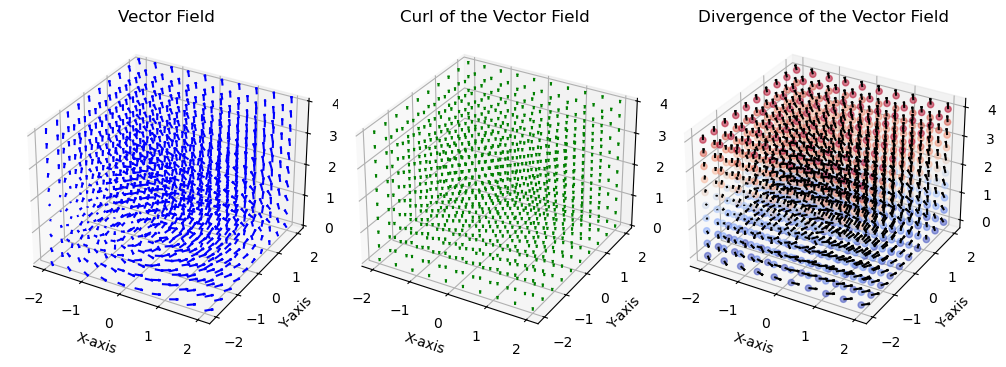

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(0, 4, 10)
X,Y,Z = np.meshgrid(x,y,z)

# Vector field components
U = -Y
V = X
W = Z**2

#Calculate the Divergence (∇·F)
divergence = 2*Z

# Calculate the Curl (∇×F)


curl_x = np.zeros_like(X)
curl_y = np.zeros_like(Y)
curl_z = 2*np.ones_like(Z)

# Create figure
fig = plt.figure(figsize=(10, 8))

# First Plot: Vector Field
ax1 = fig.add_subplot(131, projection='3d')
ax1.quiver(X, Y, Z, U, V, W, length=0.2, normalize=True, color='b')
ax1.set_title('Vector Field')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')

# Plot the Curl
ax2 = fig.add_subplot(132, projection='3d')
ax2.quiver(X,Y,Z,curl_x,curl_y,curl_z, length=0.1, normalize=True, color='g')
ax2.set_title('Curl of the Vector Field')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_zlabel('Z-axis')

# Plot the Divergence
ax3 = fig.add_subplot(133, projection='3d')
ax3.quiver(X,Y,Z,U,V,W, length=0.2, normalize=True, color='black')
# Plot Divergence as color on a surface (z=0 plane)
surf_x, surf_y = np.meshgrid(x, y)
surf_z = np.zeros_like(surf_x)
surf_div = 2* surf_z
sc = ax3.scatter(X,Y,Z, c=divergence, cmap='coolwarm', alpha=0.5)
ax3.set_title('Divergence of the Vector Field')
ax3.set_xlabel('X-axis')
ax3.set_ylabel('Y-axis')
ax3.set_zlabel('Z-axis')

plt.tight_layout()
plt.show()





Für die Rotation ist es besser dies in 2 Dimensionalen zu visualizieren

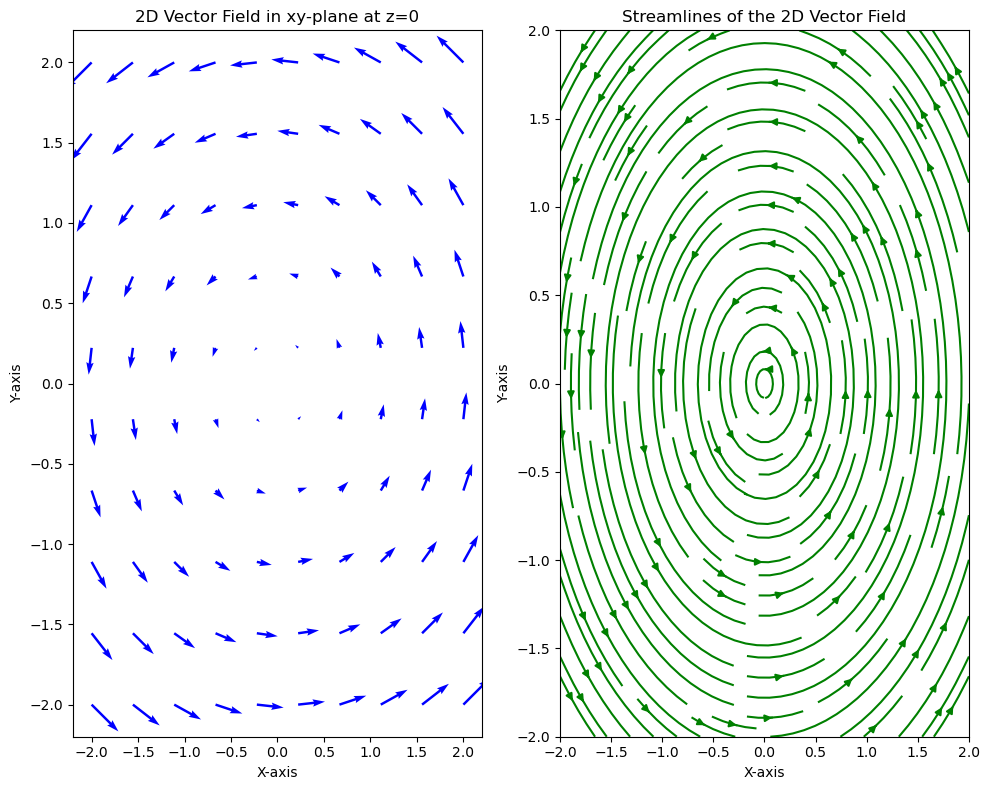

In [6]:
plt.figure(figsize=(10, 8))

# 2D Vector field in xy-plane at z = 0

z_slice = 0
X_2d, Y_2d = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
U_2d = -Y_2d
V_2d = X_2d

# Plot the 2D vector field
plt.subplot(121)
plt.quiver(X_2d, Y_2d, U_2d, V_2d, color='b')
plt.title('2D Vector Field in xy-plane at z=0')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot streamlines to show rotation
plt.subplot(122)
plt.streamplot(X_2d, Y_2d, U_2d, V_2d, color='g',density=1.2)
plt.title('Streamlines of the 2D Vector Field')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.tight_layout()
plt.show()

In diesem Bild:

+ a) positive divergenz
+ b) negative divergenz
+ c) keine divergenz

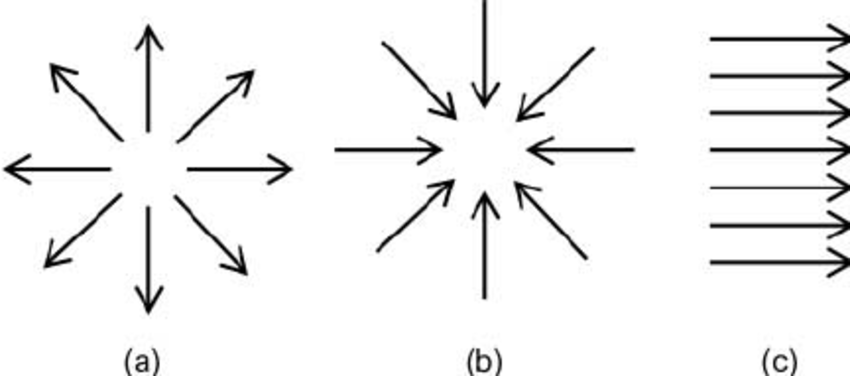


# Aufgabe 5

Hier haben wir eine Stophoide Kurve gegeben durch

\begin{align*}
\gamma :\mathbb{R} &\to \mathbb{R}^2 \\
t \mapsto \frac{1}{1+t^2} \begin{pmatrix}
2(1-t^2) \\
2t(1-t^2)
\end{pmatrix}
\end{align*}

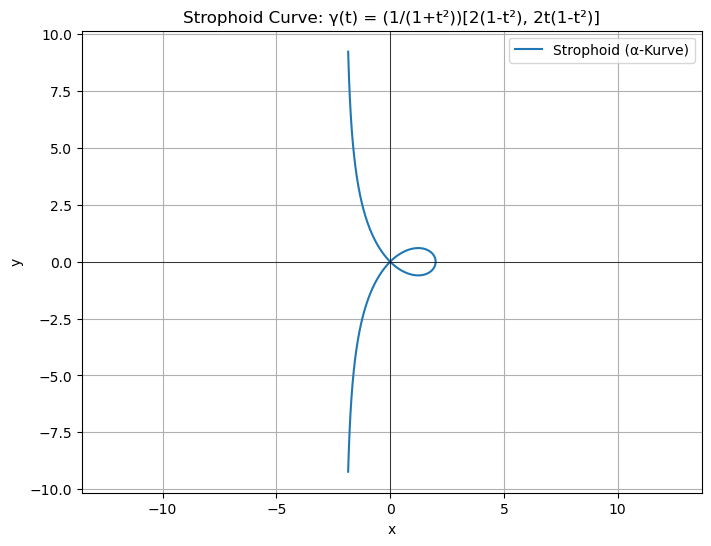

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the curve
def strophoid(t):
    denominator = 1 + t**2
    x = 2*(1 - t**2)/denominator
    y = 2*t*(1 - t**2)/denominator
    return x, y

# Generate points
t_values = np.linspace(-5, 5, 1000)
x, y = strophoid(t_values)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Strophoid (α-Kurve)')
plt.title('Strophoid Curve: γ(t) = (1/(1+t²))[2(1-t²), 2t(1-t²)]')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# Aufgabe 6

Nun visualisieren wir noch zum abschluss folgende Kurve

\begin{align*}
\gamma :\mathbb{R} &\to \mathbb{R}^3 \\
t \mapsto \begin{pmatrix}
e^t cos(t) \\
e^t sin(t) \\
e^t
\end{pmatrix}
\end{align*}

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the curve
def gamma(t):
    x = np.exp(t) * np.cos(t)
    y = np.exp(t) * np.sin(t)
    z = np.exp(t)
    return x, y, z

# Create parameter values
t_values = np.linspace(0, 5, 1000)  # Adjust range as needed
x, y, z = gamma(t_values)

# Create Plotly figure
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='lines',
    line=dict(width=4, color='blue'),
    name='γ(t)'
)])

# Add markers
for t in np.linspace(-2, 1, 6):
    x_p, y_p, z_p = gamma(t)
    fig.add_trace(go.Scatter3d(
        x=[x_p],
        y=[y_p],
        z=[z_p],
        mode='markers+text',
        marker=dict(size=5, color='red'),
        text=[f't={t:.1f}'],
        textposition="top center",
        showlegend=False
    ))

# Update layout
fig.update_layout(
    title='Interactive 3D Spiral Curve γ(t) = (eᵗcos(t), eᵗsin(t), eᵗ)',
    scene=dict(
        xaxis_title='X (eᵗcos(t))',
        yaxis_title='Y (eᵗsin(t))',
        zaxis_title='Z (eᵗ)',
    ),
    width=800,
    height=600
)

fig.show()